# Customer Churn Prediction Project

#This project demonstrates an **end-to-end data science workflow** using Python.  
It covers:
- Data loading and exploration
- Data preprocessing and visualization
- Model training and evaluation

#Goal:Predict customer churn based on historical customer data.

#Libraries Used:
- pandas, numpy for data manipulation
- matplotlib, seaborn for visualization
- scikit-learn for modeling

## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Loading the Dataset

In [ ]:
df=pd.read_csv("customer churn prediction.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3. Data Exploration

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0               0  ...   
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85          2505      0  
1                    0              3           56.95          1466      0  
2                    1              3           53.85           157      1  
3                    0              0           42.30          1400      0  
4                    1              2           70.70           925      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80          1597      0  
7039                 1              1          103.20          5698      0  
7040                 1              2           29.60          2994      0  
7041                 1              3           74.40          2660      1  
7042                 1              0          105.65          5407      0  

[7043 rows x 21 columns]

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-2170732369.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


## 4. Data Preprocessing

/tmp/ipython-input-3880184683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender",data=df,palette='Set2')


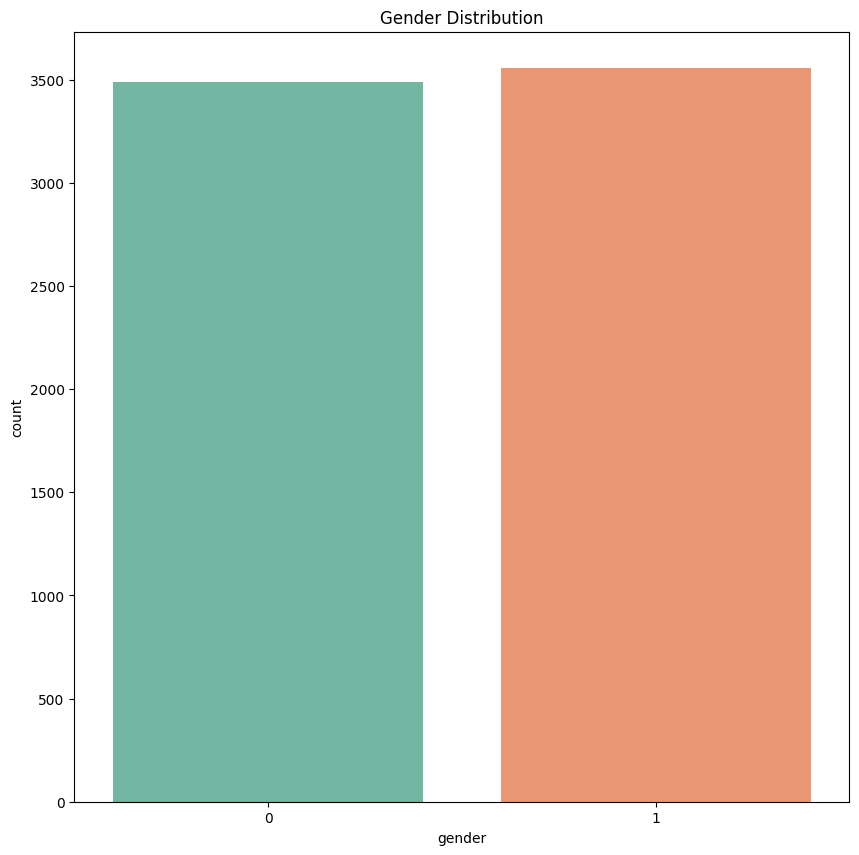

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="gender",data=df,palette='Set2')
plt.title("Gender Distribution")
plt.show()

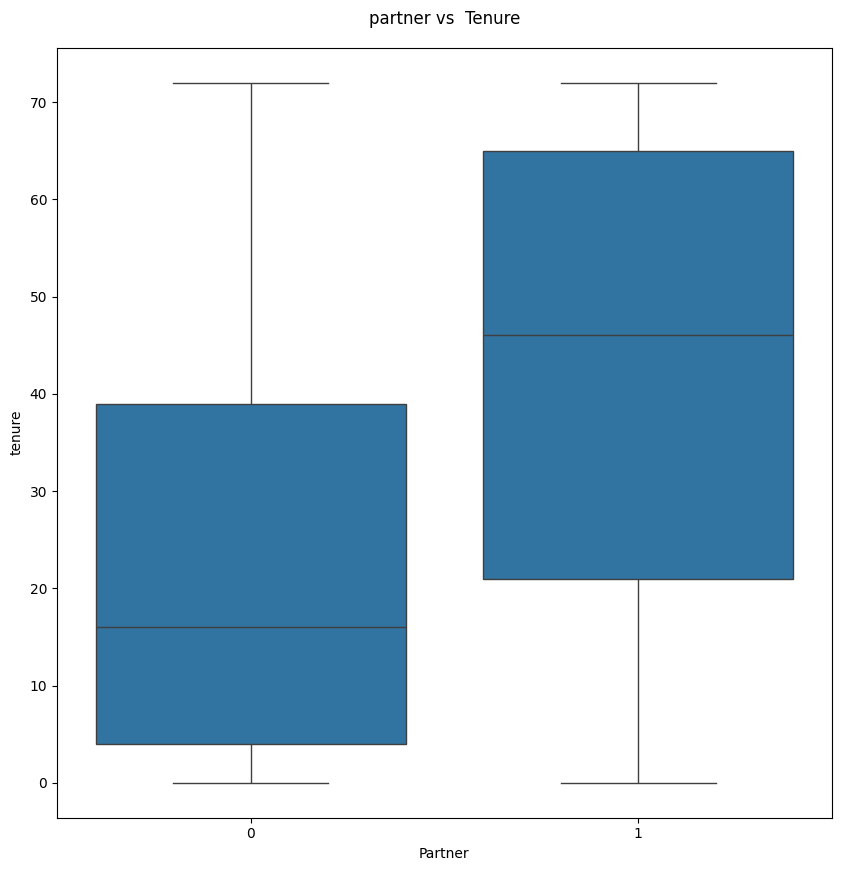

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Partner",y="tenure",data=df)
plt.title("partner vs  Tenure" ,y=1.02)
plt.show()

<Figure size 1000x1000 with 0 Axes>

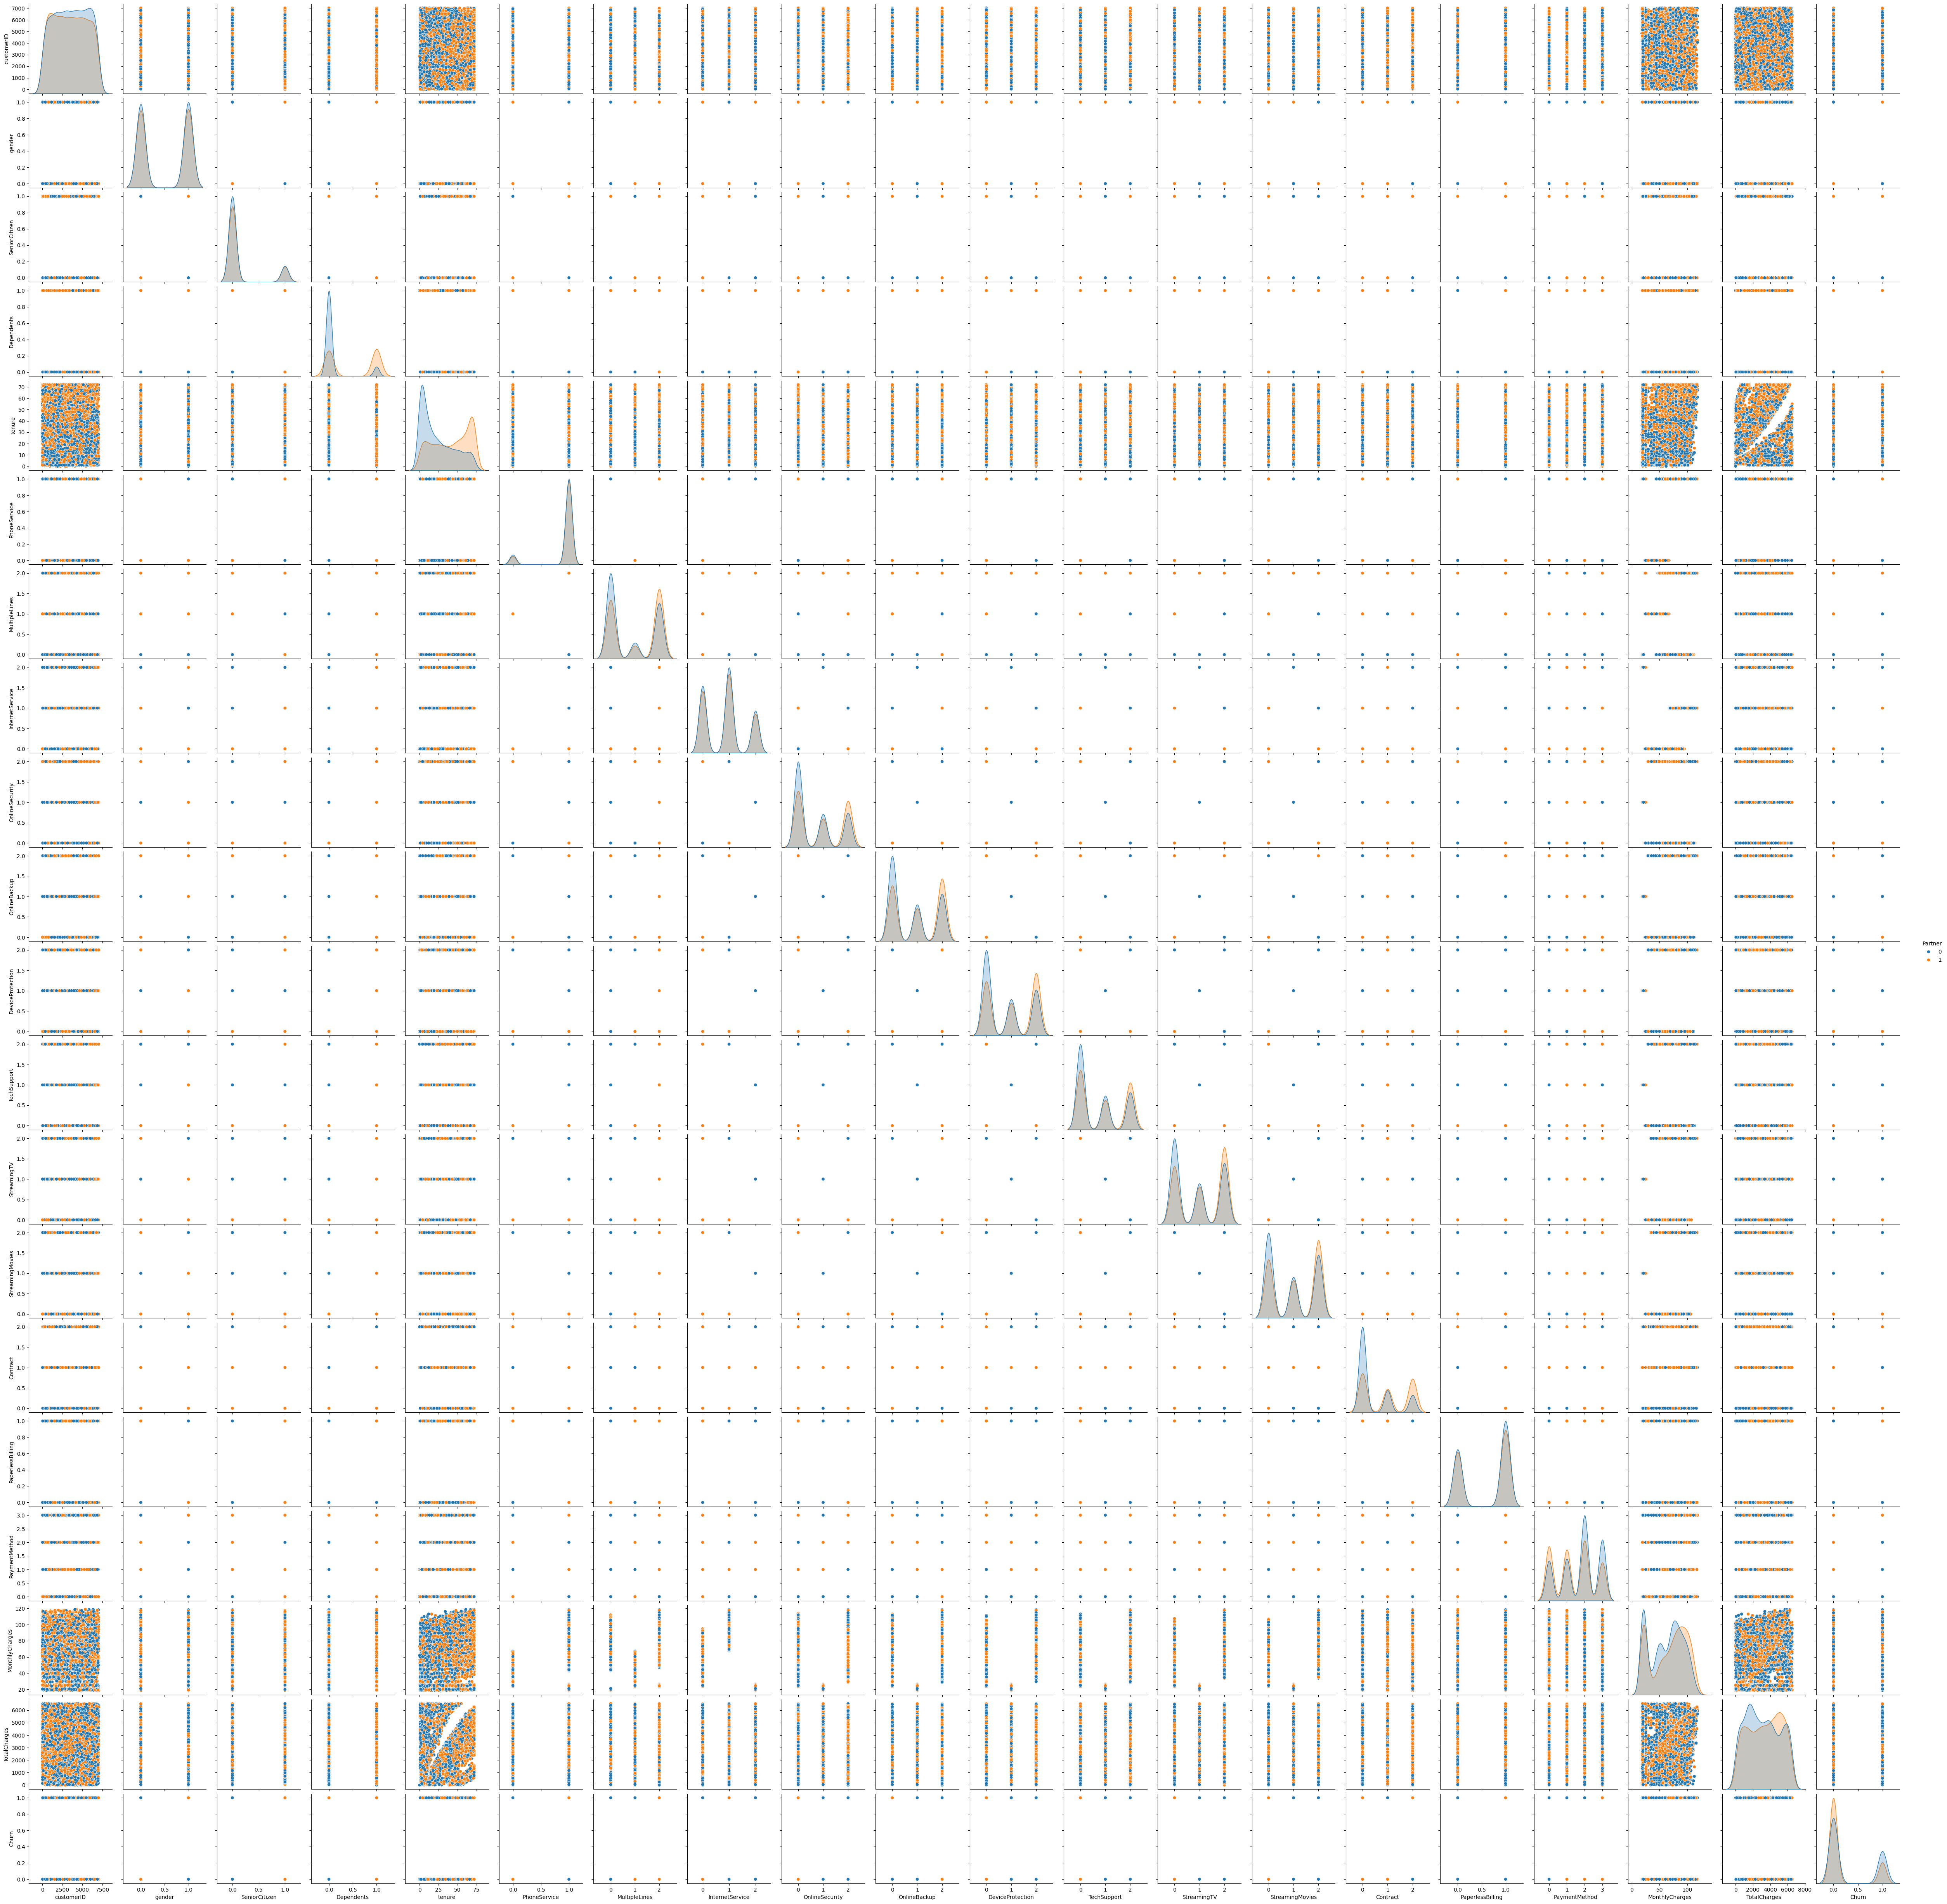

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue="Partner")
plt.show()

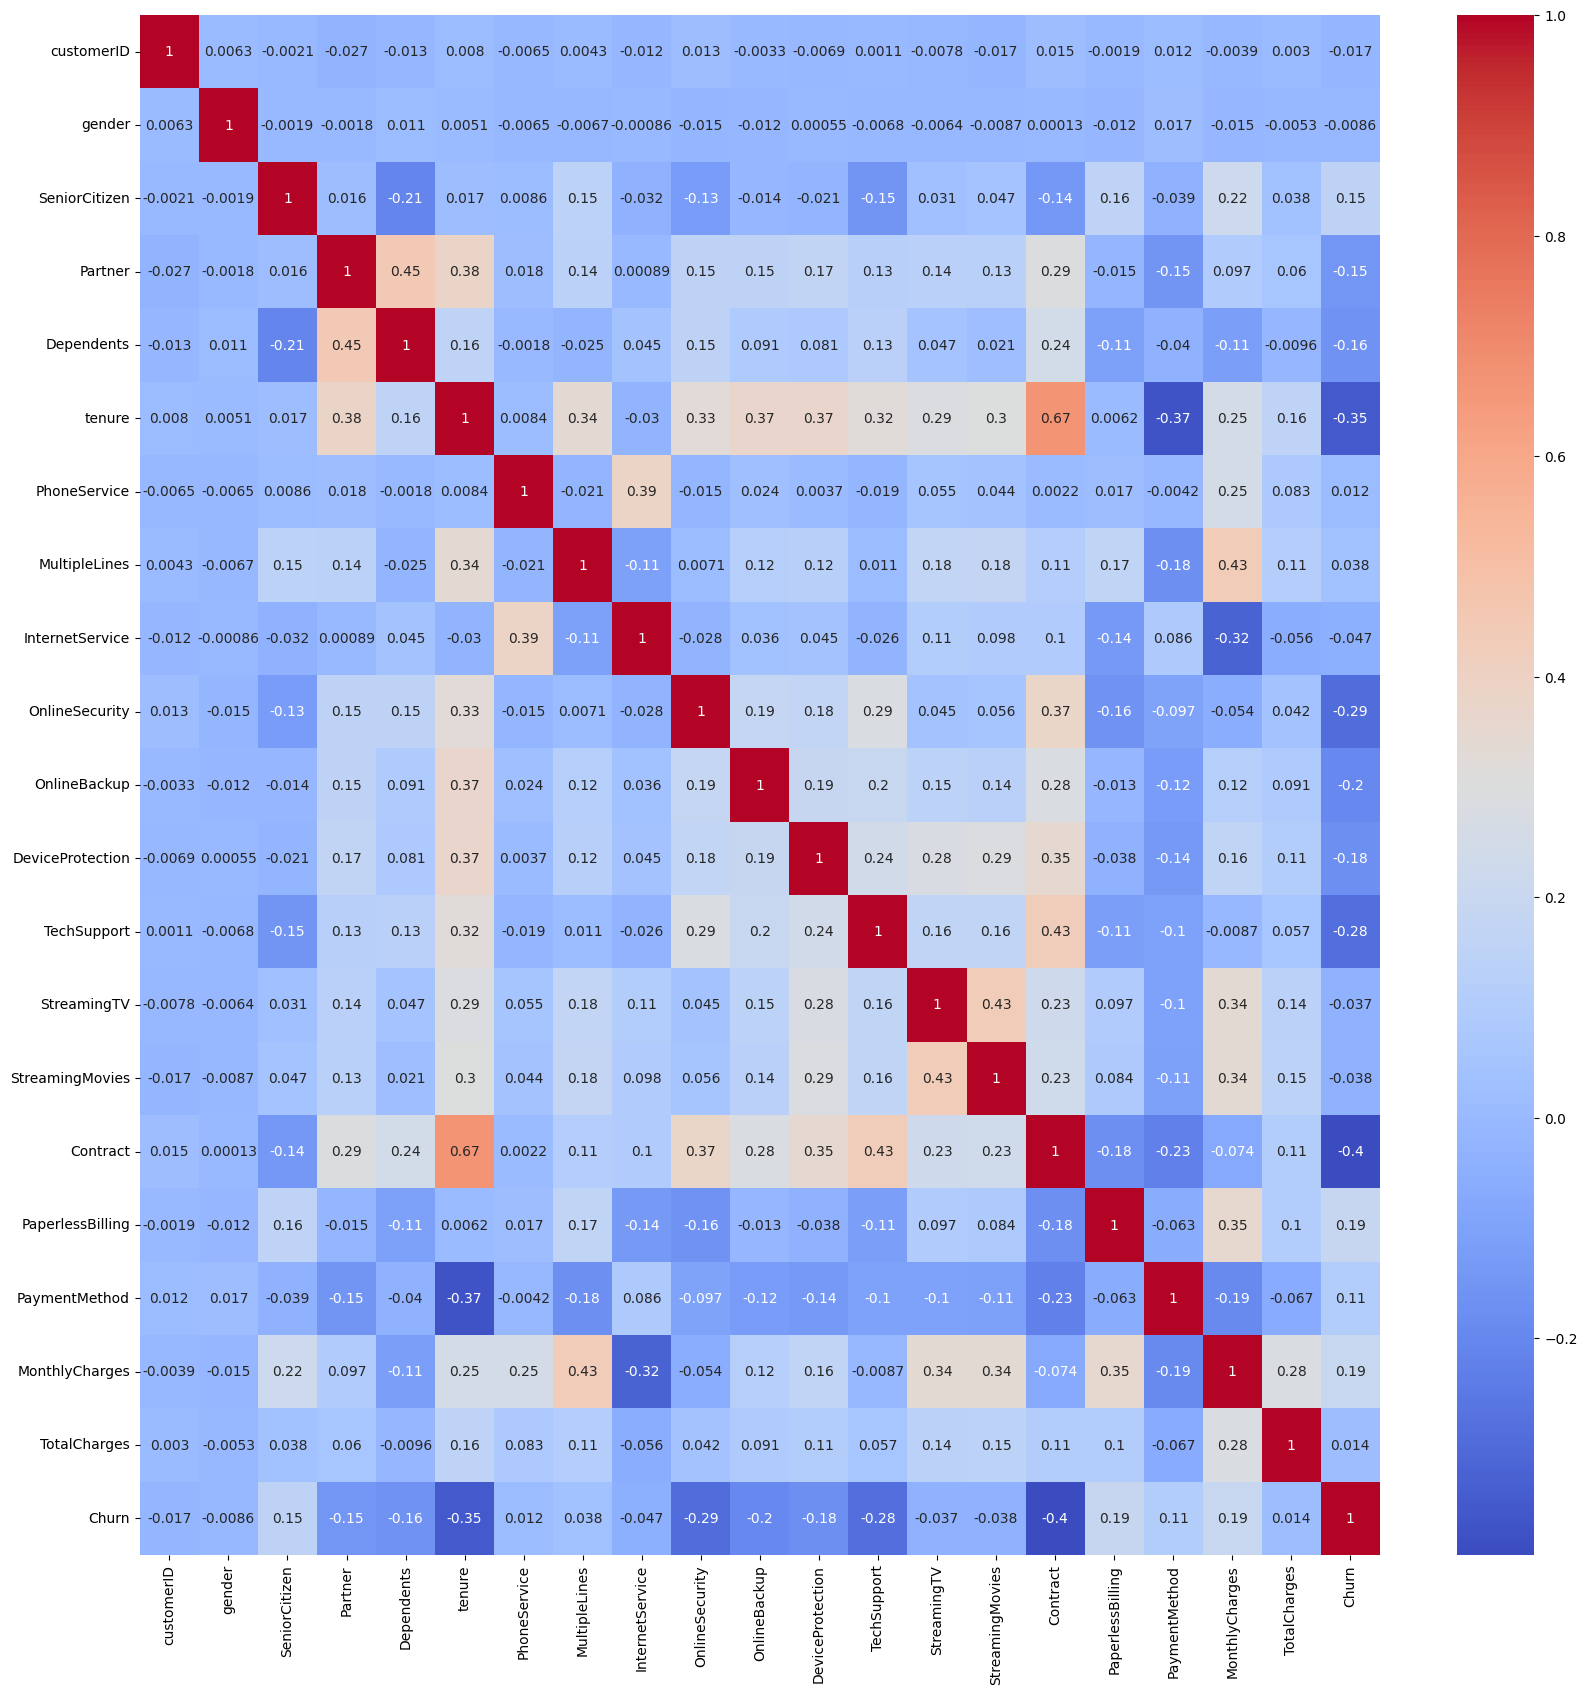

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 5. Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop("MonthlyCharges",axis=1)
y=df["MonthlyCharges"]
y

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
pre1=model.predict(x_test)
r2=r2_score(y_test,pre1)
r2

0.6516200108495939

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
a=df.drop("Churn",axis=1)
b=df["Churn"]
b

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
dtc=DecisionTreeClassifier(max_depth=4,min_samples_split=4,random_state=42)
dtc.fit(x_train,y_train)
pre2=dtc.predict(x_test)
c=accuracy_score(y_test,pre2)
c

0.7998580553584103

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x=df.drop("TechSupport",axis=1)
y=df["TechSupport"]
y

0       0
1       0
2       0
3       2
4       0
       ..
7038    2
7039    0
7040    0
7041    0
7042    2
Name: TechSupport, Length: 7043, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
s=LogisticRegression(max_iter=1000)
s.fit(x_train,y_train)
pre3=s.predict(x_test)
c=accuracy_score(y_test,pre3)
c

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8005677785663591

In [ ]:
from sklearn.ensemble import RandomForestClassifier
a= RandomForestClassifier(n_estimators=100,min_samples_split=4,random_state=42)
a.fit(x_train,y_train)
pre4=a.predict(x_test)
c=accuracy_score(y_test,pre4)
c

0.8346344925479063

## 6. Model Evaluation

In [ ]:
accuracies = {
    'LogisticRegression': accuracy_score(y_test,pre3),
    'DecisionTreeClassifier': accuracy_score(y_test,pre2),
    'RandomForestClassifier': accuracy_score(y_test,pre4)
}

# Print all accuracies
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

# Best model
best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Model: {best_model} with accuracy {accuracies[best_model]:.4f}")

LogisticRegression: 0.8006
DecisionTreeClassifier: 0.7999
RandomForestClassifier: 0.8346

Best Model: RandomForestClassifier with accuracy 0.8346


## 7. Streamlit App Deployment
Key Features:
- User-friendly interface for inputting customer details.
- Real-time churn prediction using the trained model.
- Interactive visualizations for exploring data insights.

In [ ]:
import pickle
with open('customer churn.pkl','wb') as f:
    pickle.dump(a,f)

In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Title
st.title("Model Accuracy Comparison App")

# File uploader
uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("Preview of Dataset:", df.head())

    target_column = st.selectbox("Select the Target Column", df.columns)

    # Label Encoding
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    for col in df.columns:
       if df[col].dtype == 'object':
         df[col] = le.fit_transform(df[col])
         df


    if st.button("Train Models and Compare"):
        X = df.drop(columns=[target_column])
        y = df[target_column]

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Train models
        log_reg = LogisticRegression(max_iter=1000)
        dt = DecisionTreeClassifier()
        rf = RandomForestClassifier()

        log_reg.fit(X_train, y_train)
        dt.fit(X_train, y_train)
        rf.fit(X_train, y_train)

        # Predictions
        log_reg_pred = log_reg.predict(X_test)
        dt_pred = dt.predict(X_test)
        rf_pred = rf.predict(X_test)

        # Accuracy results
        accuracies = {
            'Logistic Regression': accuracy_score(y_test, log_reg_pred),
            'Decision Tree': accuracy_score(y_test, dt_pred),
            'Random Forest': accuracy_score(y_test, rf_pred)
        }

        st.subheader("Model Accuracies")
        st.write(pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"]))

        # Best model
        best_model = max(accuracies, key=accuracies.get)
        st.success(f"Best Model: {best_model} with accuracy {accuracies[best_model]:.4f}")

Writing app.py


## 8. Conclusion

In [ ]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

35.199.23.227


In [ ]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://fast-signs-chew.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:5115 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙

## Conclusion
This analysis successfully demonstrated a machine learning pipeline for predicting customer churn.

**Key Takeaways:**
- Applied data preprocessing and visualization techniques
- Trained and evaluated a predictive model
- Achieved measurable performance (accuracy/precision/recall)

This project highlights skills in **data analysis, visualization, and machine learning**.